**The IBMQ Composer**

The IBMQ Composer is a graphic user interface (GUI) designed by IBM to allow users to construct various quantum algorithms or run other quantum experiments. It provides a easy way to create quantum circuits by dragging and dropping gates. 

Here is a link to the IBM quantum experience web page: https://www.research.ibm.com/ibm-q/ 

**The IBMQ Provider**

Previously, the Aer Provider was used to run circuits using simulators that run on the user's local device. Another provider that can be used is the IBMQ Provider. This provider allows the user to run circuits on IBM's quantum computers through the cloud. 

In [1]:
!pip install qiskit

In [0]:
from qiskit import IBMQ

In [47]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

The *backends*() function returns a list of all the available backends. Above, a call to this function returned an empty list since there are no backends available. The *stored_accounts*() function returns a list of all the enabled user accounts on the IBMQ website. Since an account has not been enabled, this function also returns an empty list.  

In [48]:
IBMQ.stored_accounts()

[]

To initialize an account and allow  access to the cloud based computers, the *enable_account*() method is used. This function requires an API token obtained from the IBMQ website. 

In [49]:
IBMQ.enable_account("7099aa657902a0c2289d1f31dfcd2166e8491773275a1c891362c73facd343a1aa9d4c77c27328bfca8de4ec42047f50c90ff7df5af406807251b7c7cab96223")

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [50]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

Once an account has been loaded, the *load_accounts*() function activates the account. 

In [0]:
IBMQ.load_accounts()

In [52]:
IBMQ.backends(operational=True, simulator=False)

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>]

Using the *backends*() function with parameters provides a filtered list of available backends.

The backend to be used is specified by the *get_backend*() function. 

In [0]:
backend=IBMQ.get_backend('ibmqx4')

At any point in the program,  the *name*() function returns the backend that is being used. 

In [54]:
backend.name()

'ibmqx4'

The *status*() function returns all the properties of the backend being used. 

In [67]:
backend.status()

BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=6, status_msg='active')

Now, a circuit can be created using the same procedure used when using the Aer provider. 

In [0]:
from qiskit import execute, QuantumRegister, ClassicalRegister, QuantumCircuit

In [0]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc = QuantumCircuit(q,c)

In [58]:
qc.h(q[0])
qc.cx(q[0],q[1])

qc.barrier(q)
qc.measure(q,c)

In [59]:
qc.draw()

In [0]:
job=execute(qc,backend=backend,shots=1024)

In [68]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [69]:
res=job.result()
res.get_counts()

/usr/local/lib/python3.6/dist-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


{'00': 475, '01': 74, '10': 58, '11': 417}

In [0]:
from qiskit.tools.visualization import plot_histogram

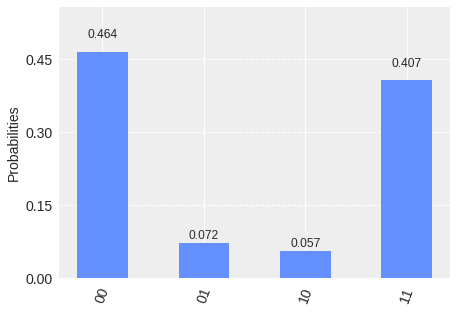

In [71]:
plot_histogram(res.get_counts())